# 1. Data Collection and Manipulation

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [12]:
# Check if the image format is valid and verify if TensorFlow can load the image, otherwise mark it as invalid.

folder_path = "./archive/train/"
invalid_images = []
dataset = []
target_size = (224, 224)

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    print(filename, end='\r')
    if os.path.isfile(file_path):
        
        # Check if the file extension is a supported image format
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Invalid Extension for {filename}.")
            invalid_images.append(filename)
            continue

        # Try loading and preprocessing the image
        try:
            img = tf.keras.preprocessing.image.load_img(file_path)  # Load the image
            img = img.resize(target_size)  # Resize to the target dimensions
            numeric_img = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to a numeric array
            numeric_img = numeric_img / 255.  # Normalize pixel values to range [0, 1]
            dataset.append(numeric_img)  # Add the preprocessed image to the dataset
        except Exception as e:
            print(f"Error loading {filename}: {e}.")
            invalid_images.append(filename)
    else:
        print(f"Skipping {filename}, not a file.")
print("images checked")
dataset_np = np.array(dataset)

print()
print("Invalid images list:", invalid_images)

# Delete invalid images (uncomment to enable deletion)
# for invalid_file in invalid_images:
#     file_path = os.path.join(folder_path, invalid_file)
#     try:
#         os.remove(file_path)
#         print(f"Deleted: {invalid_file}")
#     except Exception as e:
#         print(f"Failed to delete {invalid_file}: {e}")

images checked

Invalid images list: []


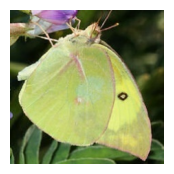

In [13]:
# check on dataset 
plt.figure(figsize=(2, 2)) 
plt.imshow(dataset_np[0])
plt.axis('off')  # Hide axes for better image display
plt.show()